In [26]:
# import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms.community import girvan_newman

#mount drive to cloud
drive.mount('/content/drive')

#read csv file and transform all datetime into dates
file_path = '/content/drive/My Drive/Data/interest.xlsx'
file_path2 = '/content/drive/My Drive/Data/connection.xlsx'
df_interest= pd.read_excel(file_path)
df_connection= pd.read_excel(file_path2)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
G = nx.Graph()

for _, row in df_interest.iterrows():
    G.add_node(
        row['Student_ID'],
        name=row['Name'],
        age=row['Age'],
        gender=row['Gender'],
        major=row['Major'],
        year=row['Year'],
        interest=row['Interest']
    )

for _, row in df_connection.iterrows():
    G.add_edge(
        row['Student_ID_1'],
        row['Student_ID_2'],
        connection_type=row['Connection_Type']
    )

for edge in list(G.edges(data=True)):
    print(edge)


(1, 2, {'connection_type': 'Friend'})
(1, 3, {'connection_type': 'Friend'})
(1, 4, {'connection_type': 'Alumna'})
(1, 5, {'connection_type': 'Friend'})
(2, 3, {'connection_type': 'Friend'})
(2, 5, {'connection_type': 'Classmate'})
(3, 4, {'connection_type': 'Neighbor'})
(3, 5, {'connection_type': 'Friend'})
(4, 5, {'connection_type': 'Friend'})


In [29]:


# Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame(degree_centrality.items(), columns=["Student_ID", "Degree_Centrality"])

# Most Connected Students
most_connected = max(degree_centrality, key=degree_centrality.get)
most_connected_students = [(node, degree) for node, degree in degree_centrality.items() if degree == degree_centrality[most_connected]]
most_connected_students_df = pd.DataFrame(most_connected_students, columns=["Student_ID", "Degree_Centrality"])

# Clustering Coefficient
clustering_coefficients = nx.clustering(G)
clustering_coefficients_df = pd.DataFrame(clustering_coefficients.items(), columns=["Student_ID", "Clustering_Coefficient"])
high_clustering_students = {node: coeff for node, coeff in clustering_coefficients.items() if coeff > 0.5}
high_clustering_students_df = pd.DataFrame(high_clustering_students.items(), columns=["Student_ID", "Clustering_Coefficient"])

# Shortest Path Length
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
furthest_pair = None
max_distance = 0
for student1, paths in shortest_path_lengths.items():
    for student2, distance in paths.items():
        if distance > max_distance:
            max_distance = distance
            furthest_pair = (student1, student2)
shortest_path_length_df = pd.DataFrame(
    [{"Student_1": furthest_pair[0], "Student_2": furthest_pair[1], "Max_Distance": max_distance}]
)

# Community Detection using Girvan-Newman
communities = next(girvan_newman(G))
community_map = {node: idx for idx, community in enumerate(communities) for node in community}
community_map_df = pd.DataFrame(community_map.items(), columns=["Student_ID", "Community"])

# Display the analysis results
print("Degree Centrality:")
print(degree_centrality_df)

print("\nMost Connected Students:")
print(most_connected_students_df)

print("\nClustering Coefficients:")
print(clustering_coefficients_df)

print("\nHigh Clustering Students:")
print(high_clustering_students_df)

print("\nShortest Path (Furthest Pair):")
print(shortest_path_length_df)

print("\nCommunity Map:")
print(community_map_df)


Degree Centrality:
   Student_ID  Degree_Centrality
0           1               1.00
1           2               0.75
2           3               1.00
3           4               0.75
4           5               1.00

Most Connected Students:
   Student_ID  Degree_Centrality
0           1                1.0
1           3                1.0
2           5                1.0

Clustering Coefficients:
   Student_ID  Clustering_Coefficient
0           1                0.833333
1           2                1.000000
2           3                0.833333
3           4                1.000000
4           5                0.833333

High Clustering Students:
   Student_ID  Clustering_Coefficient
0           1                0.833333
1           2                1.000000
2           3                0.833333
3           4                1.000000
4           5                0.833333

Shortest Path (Furthest Pair):
   Student_1  Student_2  Max_Distance
0          2          4             2

Communi

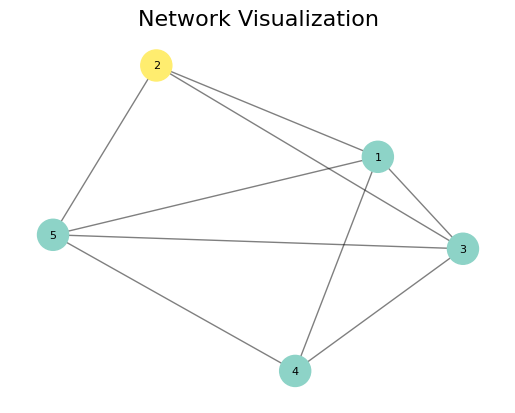

In [30]:
def visualize_network(G, community_map=None, node_size=500, font_size=8, figsize=(10, 10)):
    pos = nx.spring_layout(G)

    if community_map:
        communities = list(set(community_map.values()))
        color_map = {community: idx for idx, community in enumerate(communities)}
        node_colors = [color_map[community_map[node]] for node in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set3, node_size=node_size)
    else:
        nx.draw_networkx_nodes(G, pos, node_size=node_size)

    nx.draw_networkx_edges(G, pos, alpha=0.5)

    nx.draw_networkx_labels(G, pos, font_size=font_size, font_color="black")

    plt.title("Network Visualization", fontsize=16)
    plt.axis("off")
    plt.show()

communities = next(girvan_newman(G))
community_map = {node: idx for idx, community in enumerate(communities) for node in community}

visualize_network(G, community_map=community_map)